
# Analyse des données DVF
**Elias TOURNEUX** et **Yann VILLELLAS**
TD I, étudiant à l'ESILV en A3, promo 2025
### Mini-rapport :
#### Avancement et difficultés
#### Ratio de contribution:
 - Elias TOURNEUX : 99 %
 - Yann VILLELLAS : 1 %


## Introduction

### Import des différents modules utiles au projet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from IPython.display import IFrame
import requests
import matplotlib.cm as cm



### Import des données de 2019 et 2022 depuis l'Open Data du gouvernement

In [3]:
dvf2022 = pd.read_csv("valeursfoncieres-2022.txt", sep="|", low_memory=False)
dvf2019 = pd.read_csv("valeursfoncieres-2019.txt", sep="|", low_memory=False)

### On peut observer la nature de nos données
On observe que les données sont de type DataFrame, et qu'elles sont composées de 3803885 lignes et de 43 colonnes pour les valeurs de 2022.
Le jeu de données de 2019 est quasiment identique, et possède les mêmes en-têtes.

On va supprimer les colonnes qui ne nous intéressent pas pour notre analyse.

In [4]:
dvf2022

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,1,2.0,Appartement,NaN,24.0,1.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,84.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,88.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,1,2.0,Appartement,NaN,140.0,3.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,510.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,30/12/2022,Vente,...,NaN,1,4.0,Local industriel. commercial ou assimilé,NaN,327.0,0.0,NaN,NaN,NaN
3803881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,19/12/2022,Vente,...,NaN,2,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
3803882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,19/12/2022,Vente,...,NaN,2,2.0,Appartement,NaN,40.0,3.0,NaN,NaN,NaN
3803883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,30/12/2022,Vente,...,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN


### Nettoyage des données
En effet, nous avons remarqué que certaines données étaient manquantes ou encore inutiles dans notre analyse (comme les références des articles, documents, etc...) nous avons donc décidé de les supprimer.

#### Regardons la part de nos données qui sont nuls

In [5]:
dvf2022.isnull().sum()/len(dvf2022)*100

Identifiant de document       100.000000
Reference document            100.000000
1 Articles CGI                100.000000
2 Articles CGI                100.000000
3 Articles CGI                100.000000
4 Articles CGI                100.000000
5 Articles CGI                100.000000
No disposition                  0.000000
Date mutation                   0.000000
Nature mutation                 0.000000
Valeur fonciere                 0.649888
No voie                        34.733621
B/T/Q                          95.374019
Type de voie                   36.984294
Code voie                       1.026398
Voie                            1.029290
Code postal                     1.029816
Commune                         0.000000
Code departement                0.000000
Code commune                    0.000000
Prefixe de section             95.824295
Section                         0.004075
No plan                         0.000000
No Volume                      99.765792
1er lot         

On peut observer que certaines colonnes sont composées de beaucoup ou presque que des valeurs nulles comme : 3ème lot, 4ème lot, 5ème lot et leurs surfaces Carrez associé. Cela signifie qu'on a une grande proportionnalité de valeurs foncières avec un ou deux lots.
On remarque qu'un tiers des valeurs foncières correspondent à des terrains.

In [6]:
#Suppression des colonnes inutiles pour les demandes des valeurs foncières de 2022
dvf2022 = dvf2022.drop(['Identifiant de document', 'Reference document', '1 Articles CGI', '2 Articles CGI', '3 Articles CGI', '4 Articles CGI','5 Articles CGI', 'No disposition', 'No voie'], axis=1)
dvf2022 = dvf2022.drop(['B/T/Q', 'Type de voie', 'Code voie', 'Code commune', 'Prefixe de section', 'Section', 'No plan', 'No Volume'], axis=1)
dvf2022 = dvf2022.drop(['Voie','Nature culture speciale', 'Identifiant local', 'Nombre de lots', '3eme lot', 'Surface Carrez du 3eme lot', '5eme lot', 'Surface Carrez du 5eme lot', '4eme lot', 'Surface Carrez du 4eme lot'], axis=1)

#blabla loi carrez supprimé surface batti psk on a pas besoin de ça

#Même chose pour les demandes des valeurs foncières de 2019
dvf2019 = dvf2019.drop(['Identifiant de document', 'Reference document', '1 Articles CGI', '2 Articles CGI', '3 Articles CGI', '4 Articles CGI','5 Articles CGI', 'No disposition', 'No voie'], axis=1)
dvf2019 = dvf2019.drop(['B/T/Q', 'Type de voie', 'Code voie', 'Code commune', 'Prefixe de section', 'Section', 'No plan', 'No Volume'], axis=1)
dvf2019 = dvf2019.drop(['Voie','Nature culture speciale', 'Identifiant local', 'Nombre de lots', '3eme lot', 'Surface Carrez du 3eme lot', '5eme lot', 'Surface Carrez du 5eme lot', '4eme lot', 'Surface Carrez du 4eme lot'], axis=1)

#ValueError: could not convert string to float: '55000,00'
dvf2022['Valeur fonciere'] = dvf2022['Valeur fonciere'].str.replace(',', '.').astype(float)
dvf2019['Valeur fonciere'] = dvf2019['Valeur fonciere'].str.replace(',', '.').astype(float)

#On avait une erreur vu qu'on pouvait pas calculer sur des strings
dvf2022['Surface reelle bati'] = dvf2022['Surface reelle bati'].astype(float)
dvf2019['Surface reelle bati'] = dvf2019['Surface reelle bati'].astype(float)

#On créé une nouvelle colonne qui contient le prix au mètre carré qui est la sormme des Surface Carrez
dvf2022['Surface Carrez du 1er lot'] = dvf2022['Surface Carrez du 1er lot'].str.replace(',', '.').astype(float)
dvf2022['Surface Carrez du 2eme lot'] = dvf2022['Surface Carrez du 2eme lot'].str.replace(',', '.').astype(float)

#On remplace toutes les valeurs nulles par 0
dvf2022 = dvf2022.fillna(0)
dvf2019 = dvf2019.fillna(0)

dvf2022['Metre carre'] = dvf2022['Surface Carrez du 1er lot'].astype(float) + dvf2022['Surface Carrez du 2eme lot'].astype(float)

#Enleve les valeurs en double
dvf2022 = dvf2022.drop_duplicates(subset=['Date mutation', 'Valeur fonciere', 'Surface reelle bati', 'Metre carre'], keep='first')


#On affiche les deux tableaux
dvf2022

,Date mutation,Nature mutation,Valeur fonciere,Code postal,Commune,Code departement,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,Metre carre
0,03/01/2022,Vente,55000.0,1000.0,BOURG-EN-BRESSE,01,7,24.10,0,0.0,2.0,Appartement,24.0,1.0,0,0.0,24.10
1,03/01/2022,Vente,143000.0,1480.0,SAVIGNEUX,01,0,0.00,0,0.0,0.0,0,0.0,0.0,S,84.0,0.00
3,03/01/2022,Vente,143000.0,1480.0,SAVIGNEUX,01,1,123.23,0,0.0,2.0,Appartement,140.0,3.0,0,0.0,123.23
4,04/01/2022,Vente,300.0,1480.0,MESSIMY SUR SAONE,01,0,0.00,0,0.0,0.0,0,0.0,0.0,T,510.0,0.00
5,06/01/2022,Vente,255000.0,1560.0,MANTENAY-MONTLIN,01,0,0.00,0,0.0,1.0,Maison,108.0,5.0,S,649.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803878,23/12/2022,Echange,934000.0,75016.0,PARIS 16,75,1,0.00,96,0.0,2.0,Appartement,58.0,2.0,0,0.0,0.00
3803880,30/12/2022,Vente,3500000.0,75014.0,PARIS 14,75,3,0.00,0,0.0,4.0,Local industriel. commercial ou assimilé,327.0,0.0,0,0.0,0.00
3803881,19/12/2022,Vente,525000.0,75015.0,PARIS 15,75,49,46.65,50,0.0,3.0,Dépendance,0.0,0.0,0,0.0,46.65
3803882,19/12/2022,Vente,525000.0,75015.0,PARIS 15,75,49,46.65,50,0.0,2.0,Appartement,40.0,3.0,0,0.0,46.65


On remarque qu'après le traitement, nous avons perdus METTRE LE NBRE DE COLONNES ET LIGNES
Note : quand on fait
#Suppression des lignes avec des valeurs manquantes
dvf2022 = dvf2022.dropna()
dvf2019 = dvf2019.dropna()

ça enlève toute la ligne enft

## Début de l'analyse de notre jeu de données

### 1. Quel département a le prix moyen au mètre carré le plus élevé ?

In [7]:
prix_m2_departement_2022 = dvf2022.groupby('Code departement')['Valeur fonciere'].mean() / dvf2022.groupby('Code departement')['Metre carre'].mean()

#On affiche
prix_m2_departement_2022.idxmax()

'22'

### 2. Quel département a le prix moyen du terrain au mètre carré le plus élevé ?

In [8]:
prix_m2_terrain_departement_2022 = dvf2022.groupby('Code departement')['Valeur fonciere'].mean() / dvf2022.groupby('Code departement')['Surface terrain'].mean()

#On affiche
prix_m2_terrain_departement_2022.idxmax()

'75'

### 3. Représentation graphique du prix moyen au mètre carré par département

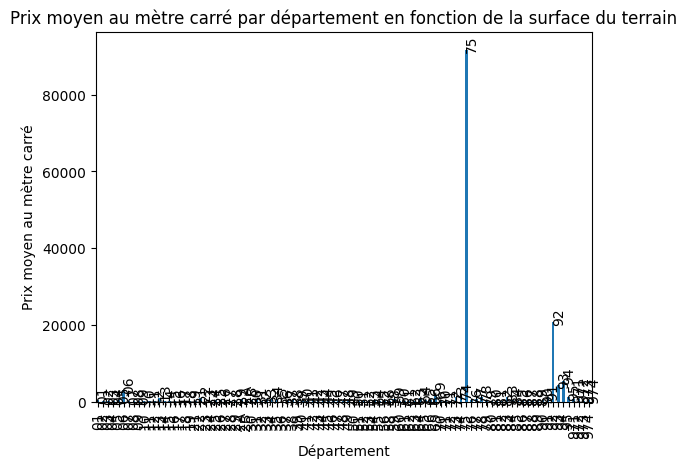

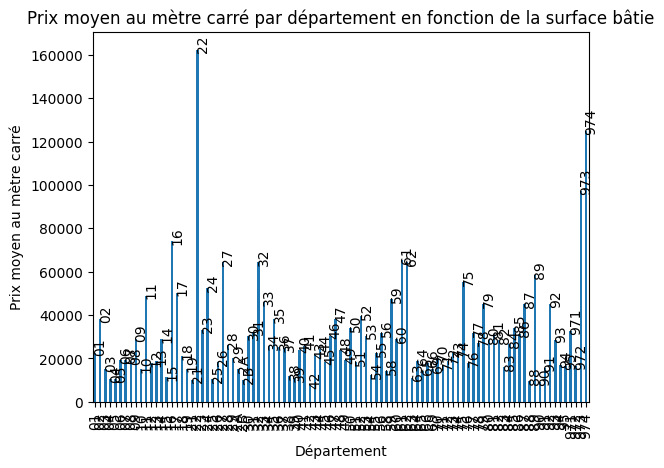

In [9]:
# Graphique du prix moyen au mètre carré par département en fonction de la surface du terrain
fig, ax = plt.subplots()
prix_m2_terrain_departement_2022.plot(kind='bar', x='Code departement', y='Prix moyen au mètre carré')
ax.set_xlabel('Département')
ax.set_ylabel('Prix moyen au mètre carré')
ax.set_title('Prix moyen au mètre carré par département en fonction de la surface du terrain')
for i, v in enumerate(prix_m2_terrain_departement_2022):
    ax.text(i-0.3, v+10, str(prix_m2_terrain_departement_2022.index[i]), rotation=90)

# Graphique du prix moyen au mètre carré par département en fonction de la surface bâtie
fig, ax = plt.subplots()
prix_m2_departement_2022.plot(kind='bar', x='Code departement', y='Prix moyen au mètre carré')
ax.set_xlabel('Département')
ax.set_ylabel('Prix moyen au mètre carré')
ax.set_title('Prix moyen au mètre carré par département en fonction de la surface bâtie')
for i, v in enumerate(prix_m2_departement_2022):
    ax.text(i-0.3, v+10, str(prix_m2_departement_2022.index[i]), rotation=90)

plt.show()

### 4. Quelle est la ville ayant le prix moyen au mètre carré le plus élevé ?

In [10]:
ville_prix_moyen_eleve_2022 = dvf2022.groupby('Commune')['Valeur fonciere'].mean() / dvf2022.groupby('Commune')['Metre carre'].mean()

#On affiche
ville_prix_moyen_eleve_2022.idxmax()

'AAST'

### 5. Quel est le type de bien ayant le prix moyen au mètre carré le plus élevé ?


In [11]:
type_de_bien_2022 = dvf2022.groupby('Type local')['Valeur fonciere'].mean()

#On affiche
type_de_bien_2022.idxmax()

'Local industriel. commercial ou assimilé'

### 6. Analyse du prix moyen au mètre carré dans les arrondissements de Paris

C:\Users\elias\AppData\Local\Temp\ipykernel_20792\2431438430.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dvf2022_paris['Arrondissement'] = dvf2022_paris['Commune'].str.split(' ').str[1].astype(int)


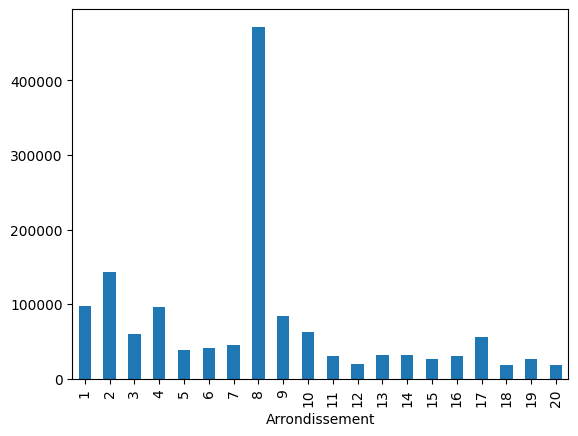

In [12]:
#Analyse du prix moyen au mètre carré dans les arrondissements de Paris

#On créé un nouveau tableau qui contient que les arrondissements de Paris
dvf2022_paris = dvf2022[dvf2022['Code departement'] == '75']

#On créé une colonne pour le numéro de l'arrondissement
dvf2022_paris['Arrondissement'] = dvf2022_paris['Commune'].str.split(' ').str[1].astype(int)

#On récupère la moyenne du prix au mètre carré par arrondissement
prix_m2_arrondissement_2022 = dvf2022_paris.groupby('Arrondissement')['Valeur fonciere'].mean() / dvf2022_paris.groupby('Arrondissement')['Metre carre'].mean()

#Plot en histogramme
prix_m2_arrondissement_2022.plot(kind='bar', x='Arrondissement', y='Prix moyen au mètre carré')

# Créer une carte centrée sur Paris
paris_map = folium.Map(location=[48.8566, 2.3522], zoom_start=12)

# Trouver le prix moyen le plus élevé
max_prix_m2 = prix_m2_arrondissement_2022.max()

geojson_url = f"https://france-geojson.gregoiredavid.fr/repo/departements/75-paris/communes-75-paris.geojson"
geojson_json = requests.get(geojson_url).json()

# Boucler sur chaque arrondissement et ajouter un polygone à la carte
for arrondissement in prix_m2_arrondissement_2022.index:
    prix_m2 = prix_m2_arrondissement_2022[arrondissement]

    # Tri de prix_m2_arrondissement_2022 par ordre croissant
    prix_m2_arrondissement_2022 = prix_m2_arrondissement_2022.sort_values()
    
    # Définir la valeur maximale de prix au mètre carré
    max_price = prix_m2_arrondissement_2022.max()
    min_price = prix_m2_arrondissement_2022.min()  

    for coord in geojson_json['features']:
        arrondissement_insee = arrondissement < 10 and "0" + str(arrondissement) or str(arrondissement)
        if coord['properties']['code'] == "751"+str(arrondissement_insee):
            color = [int(255 * ((max_price - prix_m2) / (max_price - min_price))), 0, int(255 * ((prix_m2 - min_price) / (max_price - min_price)))]
            color = '#%02x%02x%02x' % tuple(color)
            # Ajoute color à coord['geometry']['color']
            coord['geometry']['color'] = color

            #Calculer le centre de l'arrondissement
            center = [sum([coord['geometry']['coordinates'][0][i][1] for i in range(len(coord['geometry']['coordinates'][0]))]) / len(coord['geometry']['coordinates'][0]), sum([coord['geometry']['coordinates'][0][i][0] for i in range(len(coord['geometry']['coordinates'][0]))]) / len(coord['geometry']['coordinates'][0])]
            folium.GeoJson(data=coord['geometry'], style_function=lambda x: {"fillColor": x['geometry']['color'], "color": x['geometry']['color']}).add_to(paris_map)
            
            # Ajouter le prix moyen au mètre carré
            folium.Marker(center, popup="Arrondissement "+str(arrondissement)+" : "+str(round(prix_m2,2))+" €/m²").add_to(paris_map)
            break

# Ajouter un contrôle de couches
folium.LayerControl().add_to(paris_map)

# Afficher la carte
paris_map.save("carte_paris.html")

### 7. Analyse du prix moyen au mètre carré dans les arrondissements de Marseille

IndexError: index 0 is out of bounds for axis 0 with size 0

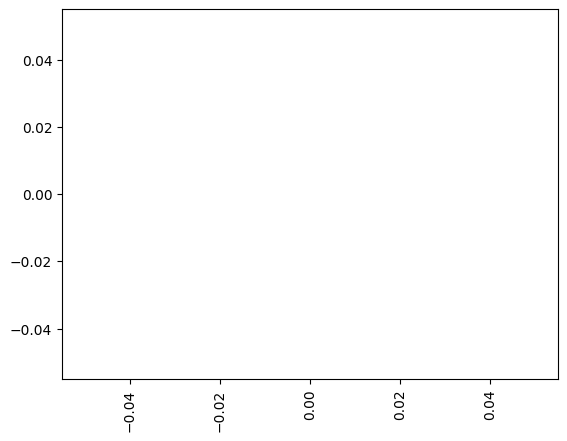

In [13]:
#Analyse du prix moyen au mètre carré dans les arrondissements de Marseille

#On créé un nouveau tableau qui contient que les arrondissements de Marseille
dvf2022_marseille = dvf2022[dvf2022['Commune'] == 'Marseille']

#On créé une colonne pour le numéro de l'arrondissement
dvf2022_marseille['Arrondissement'] = dvf2022_marseille['Commune'].str.split(' ').str[1].astype(int)

#On récupère la moyenne du prix au mètre carré par arrondissement
prix_m2_arrondissement_2022 = dvf2022_paris.groupby('Arrondissement')['Valeur fonciere'].mean() / dvf2022_paris.groupby('Arrondissement')['Metre carre'].mean()

#Plot en histogramme
prix_m2_arrondissement_2022.plot(kind='bar', x='Arrondissement', y='Prix moyen au mètre carré')